# Part 4 - Modeling

In [1]:
# Load packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset

df = pd.read_csv('Part_3.csv')
pd.set_option("display.max_columns", None)
display(df.head())

loan_status  loan_amnt  term  int_rate  installment  emp_length  \
0            1     5000.0    36     10.65       162.87        10.0   
1            0     2500.0    60     15.27        59.83         0.0   
2            1     2400.0    36     15.96        84.33        10.0   
3            1    10000.0    36     13.49       339.31        10.0   
4            1     3000.0    60     12.69        67.79         1.0   

   annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0     24000.0  27.65          0.0             1.0       3.0      0.0   
1     30000.0   1.00          0.0             5.0       3.0      0.0   
2     12252.0   8.72          0.0             2.0       2.0      0.0   
3     49200.0  20.00          0.0             1.0      10.0      0.0   
4     80000.0  17.94          0.0             0.0      15.0      0.0   

   revol_bal  revol_util  total_acc  pub_rec_bankruptcies  fico_score  \
0    13648.0        83.7       76.0                   0.0         737   
1     1687.0         9.4       76.0                   0.0         742   
2     2956.0        98.5       76.0                   0.0         737   
3     5598.0        21.0       76.0                   0.0         692   
4    27783.0        53.9       76.0                   0.0         697   

   fico_class  sub_grade_A1  sub_grade_A2  sub_grade_A3  sub_grade_A4  \
0           3             0             0             0             0   
1           4             0             0             0             0   
2           3             0             0             0             0   
3           3             0             0             0             0   
4           3             0             0             0             0   

   sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  \
0             0             0             1             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_B5  sub_grade_C1  sub_grade_C2  sub_grade_C3  sub_grade_C4  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             1             0             0             0             0   

   sub_grade_C5  sub_grade_D1  sub_grade_D2  sub_grade_D3  sub_grade_D4  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             1             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_D5  sub_grade_E1  sub_grade_E2  sub_grade_E3  sub_grade_E4  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_E5  sub_grade_F1  sub_grade_F2  sub_grade_F3  sub_grade_F4  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   sub_grade_F5 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Columns: 130 entries, loan_status to addr_state_WY
dtypes: float64(14), int64(116)
memory usage: 39.5 MB


In [4]:
# Checking nulls

round(100 * (df.isnull().sum() / len(df.index)), 2).value_counts()

0.0    130
dtype: int64

In [5]:
print(df.columns.tolist())

['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score', 'fico_class', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verif_stat', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolid

In [6]:
df.shape

(39786, 130)

In [7]:
# Copy of the Data Frame

df_copy = df

## Training models

### Data splitting and standardization

In [8]:
df.loan_status.value_counts()

1    34116
0     5670
Name: loan_status, dtype: int64

In [9]:
# Checking the percentage of Charged off loans (loan_status = 0)

(df.loan_status == 0).sum() / len(df.loan_status) * 100

14.251244156235861

In [10]:
# Loading train_test_split

from sklearn.model_selection import train_test_split

In [11]:
# Spliting data into X and y and checking the shape

X = df.drop('loan_status', axis=1)
y = df['loan_status'].values

print(X.shape)
print(y.shape)

(39786, 129)
(39786,)


In [12]:
# Data splitting into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
# Checking the size of the data split

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27850, 129)
(11936, 129)
(27850,)
(11936,)


In [14]:
# Checking the percentago of Charged off loans (loan_status = 0) in the train and test sets 

ratio_train = (y_train == 0).sum() / len(y_train) * 100
ratio_test = (y_test == 0).sum() / len(y_test) * 100
print("Percentage of the Charged off loans in the training set: ", ratio_train)
print("Percentage of the Charged off loans in the testing set: ", ratio_test)

Percentage of the Charged off loans in the training set:  14.287253141831238
Percentage of the Charged off loans in the testing set:  14.167225201072387


The data is not balanced in the target. The SMOTE method will be implemented.

In [15]:
# Importing SMOTE to balance the data

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [16]:
# Checking the data after SMOTE method

print(X_resampled.shape)
print(y_resampled.shape)

(47742, 129)
(47742,)


In [17]:
ratio_res = (y_resampled == 0).sum() / len(y_resampled) * 100
print("Percentage of the Charged off loans in the resampled set: ", ratio_res)

Percentage of the Charged off loans in the resampled set:  50.0


In [18]:
np.unique(y_resampled, return_counts=True)

(array([0, 1], dtype=int64), array([23871, 23871], dtype=int64))

In [19]:
# Data standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_resampled)
X_scaled_train = scaler.transform(X_resampled)
X_scaled_test = scaler.transform(X_test)

In [20]:
print("First row of X_scaled_train: \n", X_scaled_train[0])
print("First row of X_scaled_test: \n", X_scaled_test[0])

First row of X_scaled_train: 
 [-8.62601338e-01 -7.59007117e-01 -1.36002600e+00 -8.32447770e-01
  5.99288766e-01 -2.02562809e-01  1.11229990e-01 -3.35729711e-01
 -9.28012868e-01 -5.42268446e-01 -2.84100100e-01 -6.44165359e-01
  3.38986771e-01  1.87042255e-01 -2.55951239e-01  1.56683625e-01
 -7.74534532e-02 -1.28203054e-01 -1.50396811e-01 -1.66645138e-01
  4.69602295e+00 -2.07019668e-01 -1.69216485e-01 -1.78924586e-01
 -2.14232765e-01 -1.98908289e-01 -2.08281878e-01 -1.86273967e-01
 -1.78362748e-01 -1.55841695e-01 -1.39004786e-01 -1.35680123e-01
 -1.19394562e-01 -1.46416327e-01 -1.36478512e-01 -1.23741592e-01
 -1.18851983e-01 -1.05952629e-01 -1.00565429e-01 -9.28417843e-02
 -8.34281920e-02 -8.01846637e-02 -7.12290488e-02 -6.06549352e-02
 -5.24544088e-02 -5.26547888e-02 -4.46523193e-02 -3.99302879e-02
 -3.48760794e-02 -2.78495968e-02 -3.00247632e-02 -2.09775555e-02
 -7.28479863e-01 -6.47252580e-03 -3.63501917e-02 -2.23378024e-01
  1.25176364e+00  2.30208007e-01 -1.55205963e-01  3.4107918

In [21]:
# Importing metrics and classification report

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [22]:
# Function using to create a classification reports

def evaluate(prediction, y_test): 
    result = classification_report(y_test, prediction, output_dict=True, zero_division=1)
    f1 = result['0']['f1-score'] # F1 score for Charged off loans
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

It is very important to identify borrowers who may default on their loans. Therefore, the evaluation report will focus on the F1 result related to unpaid liabilities.

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_scaled_train, y_resampled)

DecisionTreeClassifier()

In [24]:
dtree_prediction = dtree.predict(X_scaled_test)

In [25]:
print(classification_report(y_test, dtree_prediction, zero_division=1))

dtree_pr= evaluate(dtree_prediction, y_test)
dtree_pr

              precision    recall  f1-score   support

           0       0.19      0.23      0.21      1691
           1       0.87      0.84      0.85     10245

    accuracy                           0.75     11936
   macro avg       0.53      0.53      0.53     11936
weighted avg       0.77      0.75      0.76     11936



{'f1-score': 0.21, 'accuracy': 0.75}

In [26]:
# Confusion matrix

confusion_matrix(y_test, dtree_prediction)

array([[ 383, 1308],
       [1634, 8611]], dtype=int64)

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_scaled_train, y_resampled)

RandomForestClassifier()

In [28]:
rf_prediction = rf.predict(X_scaled_test)

In [29]:
print(classification_report(y_test, rf_prediction, zero_division=1))
rf_pr = evaluate(rf_prediction, y_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.32      0.03      0.05      1691
           1       0.86      0.99      0.92     10245

    accuracy                           0.85     11936
   macro avg       0.59      0.51      0.49     11936
weighted avg       0.78      0.85      0.80     11936

{'f1-score': 0.05, 'accuracy': 0.85}


In [30]:
confusion_matrix(y_test, rf_prediction)

array([[   46,  1645],
       [   97, 10148]], dtype=int64)

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_scaled_train, y_resampled)

C:\Users\barte\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [32]:
lr_prediction = lr.predict(X_scaled_test)

In [33]:
print(classification_report(y_test, lr_prediction, zero_division=1))
lr_pr = evaluate(lr_prediction, y_test)
print(lr_pr)

              precision    recall  f1-score   support

           0       0.55      0.02      0.03      1691
           1       0.86      1.00      0.92     10245

    accuracy                           0.86     11936
   macro avg       0.70      0.51      0.48     11936
weighted avg       0.82      0.86      0.80     11936

{'f1-score': 0.03, 'accuracy': 0.86}


In [34]:
confusion_matrix(y_test, lr_prediction)

array([[   30,  1661],
       [   25, 10220]], dtype=int64)

### Naïve Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_scaled_train, y_resampled)

GaussianNB()

In [36]:
nb_prediction = nb.predict(X_scaled_test)

In [37]:
print(classification_report(y_test, nb_prediction, zero_division=1))
nb_pr = evaluate(nb_prediction, y_test)
print(nb_pr)

              precision    recall  f1-score   support

           0       0.16      0.47      0.24      1691
           1       0.87      0.60      0.71     10245

    accuracy                           0.58     11936
   macro avg       0.52      0.54      0.48     11936
weighted avg       0.77      0.58      0.65     11936

{'f1-score': 0.24, 'accuracy': 0.58}


In [38]:
confusion_matrix(y_test, nb_prediction)

array([[ 802,  889],
       [4092, 6153]], dtype=int64)

### K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
knn.fit(X_scaled_train, y_resampled)

KNeighborsClassifier()

In [41]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [42]:
knn_prediction = knn.predict(X_scaled_test)

In [43]:
print(classification_report(knn_prediction, y_test, zero_division=1))
knn_pr = evaluate(knn_prediction, y_test)
knn_pr

              precision    recall  f1-score   support

           0       0.10      0.24      0.14       688
           1       0.95      0.86      0.90     11248

    accuracy                           0.83     11936
   macro avg       0.52      0.55      0.52     11936
weighted avg       0.90      0.83      0.86     11936



{'f1-score': 0.14, 'accuracy': 0.83}

In [44]:
confusion_matrix(y_test, knn_prediction)

array([[ 168, 1523],
       [ 520, 9725]], dtype=int64)

### Multi Layer Perceptron Classifier (MLP)

In [45]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)

In [46]:
mlp.fit(X_scaled_train, y_resampled)

C:\Users\barte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [47]:
mlp_prediction = mlp.predict(X_scaled_test)

In [48]:
print(classification_report(mlp_prediction, y_test, zero_division=1))
mlp_pr = evaluate(mlp_prediction, y_test)
mlp_pr

              precision    recall  f1-score   support

           0       0.21      0.23      0.22      1566
           1       0.88      0.87      0.88     10370

    accuracy                           0.79     11936
   macro avg       0.55      0.55      0.55     11936
weighted avg       0.79      0.79      0.79     11936



{'f1-score': 0.22, 'accuracy': 0.79}

In [49]:
confusion_matrix(y_test, mlp_prediction)

array([[ 356, 1335],
       [1210, 9035]], dtype=int64)

### XGBoost Classifier

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

In [51]:
xgb.fit(X_scaled_train, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [52]:
xgb_prediction = xgb.predict(X_scaled_test)

In [53]:
print(classification_report(xgb_prediction, y_test, zero_division=1))
xgb_pr = evaluate(xgb_prediction, y_test)
xgb_pr

              precision    recall  f1-score   support

           0       0.05      0.28      0.09       323
           1       0.98      0.86      0.92     11613

    accuracy                           0.85     11936
   macro avg       0.52      0.57      0.50     11936
weighted avg       0.95      0.85      0.89     11936



{'f1-score': 0.09, 'accuracy': 0.85}

In [54]:
confusion_matrix(y_test, xgb_prediction)

array([[   91,  1600],
       [  232, 10013]], dtype=int64)

In [55]:
prediction_data={'Model': ['Decision Tree',
                          'Random Forest',
                          'Logistic Regression',
                          'Naive Bayes',
                          'KNN',
                          'MLP',
                          'XGB'
                         ],
                 
                  'F1-score': [dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              lr_pr['f1-score'],
                              nb_pr['f1-score'],
                              knn_pr['f1-score'],
                              mlp_pr['f1-score'],
                              xgb_pr['f1-score']
                         ],
                 
                  'Accuracy': [dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              lr_pr['accuracy'],
                              nb_pr['accuracy'],
                              knn_pr['accuracy'],
                              mlp_pr['accuracy'],
                              xgb_pr['accuracy']
                         ],
                 
                    }
 
# Create DataFrame
prediction_table = pd.DataFrame(prediction_data)
prediction_table

Model  F1-score  Accuracy
0        Decision Tree      0.21      0.75
1        Random Forest      0.05      0.85
2  Logistic Regression      0.03      0.86
3          Naive Bayes      0.24      0.58
4                  KNN      0.14      0.83
5                  MLP      0.22      0.79
6                  XGB      0.09      0.85

The three models: Random Forest, Logistic Regression and XGB have high accuracy and very low f1_score. The answers are unbalanced (only a few negative answers (0) for Random Forest and Logistic Regression). This means that these models predict that most borrowers will repay their loans (loan_status = 1). This is due to the significant advantage of borrowers who have repaid their liabilities. Prediction of the KNN algorithm shows also high accuracy and moderately good f1_score. The models: Decision Tree, MLP and Naive Bayes are characterized by better balanced data and better f1_score for Charged off loans (best f1_score for Naive Bayes algorithm). Decision Tree and MLP show better accuracy. The accuracy for Naive Bayes is noticeably lower. According to all model scores the MLP algorithm seems to be the best (best balance between f1_score and accuracy). 

## Data compression by PCA

In [56]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit_transform(X_scaled_train)

array([[-1.68398409e+00, -1.44855949e+00,  1.28090924e+00, ...,
        -3.85237213e-03,  1.19659109e-02,  4.26410282e-02],
       [-1.05818262e+00, -1.25776085e+00, -1.51927496e+00, ...,
        -4.89468397e-02, -1.00057421e-02,  1.26062829e-01],
       [ 1.27019319e+00,  1.85234210e+00, -3.12363487e+00, ...,
        -3.72718751e-02, -3.41549864e-02, -1.08264112e-01],
       ...,
       [ 5.24404710e-01, -2.87481808e+00,  4.78764379e-02, ...,
        -3.40910387e-01,  1.92252021e-02,  1.08612210e-01],
       [ 2.91060127e-03,  7.94094193e-01,  1.42901205e+00, ...,
         2.90994648e-01, -1.09148470e-01, -8.62545107e-02],
       [ 3.02125833e+00,  4.34818482e-01, -1.11317160e+00, ...,
        -1.84531769e-01,  1.23580601e-01, -2.06120515e-01]])

In [57]:
pca.components_[0]

array([ 2.54401069e-01,  2.30490407e-01,  4.20561552e-01,  2.39688656e-01,
        7.11830627e-02,  1.01150214e-01,  1.49058108e-01,  5.86769790e-02,
        4.32246194e-02,  1.09074072e-01,  7.65797604e-02,  1.74343373e-01,
        2.93408247e-01,  9.47752422e-02,  7.52613976e-02, -3.22736088e-01,
       -2.99984255e-01, -1.32288226e-01, -1.40526274e-01, -1.37293490e-01,
       -1.37840629e-01, -1.12292530e-01, -6.86130544e-02, -5.73339820e-02,
       -4.66898599e-02, -2.97092885e-02, -1.68527142e-02,  2.10439032e-04,
        8.46677236e-03,  8.10145467e-03,  1.48871790e-02,  2.25996305e-02,
        2.27254071e-02,  4.28918504e-02,  4.63845853e-02,  4.69183188e-02,
        5.15710639e-02,  5.17720122e-02,  5.58566733e-02,  5.58576379e-02,
        5.93696327e-02,  5.80668207e-02,  5.62655129e-02,  4.58010085e-02,
        4.45584168e-02,  4.86321574e-02,  4.60928963e-02,  3.94627235e-02,
        3.65948466e-02,  3.20462370e-02,  3.34503194e-02,  2.23607545e-02,
        8.06467556e-04, -

In [58]:
# Percentage of variance explained by each of the selected components.

pca.explained_variance_ratio_

array([0.03128691, 0.02729375, 0.02538918, 0.0155255 , 0.01409422,
       0.01291181, 0.01162694, 0.01082567, 0.01051821, 0.00963285,
       0.00931981, 0.00893177, 0.00877373, 0.00868553, 0.0086149 ,
       0.00858543, 0.00851191, 0.00849756, 0.00846362, 0.00843881,
       0.00841081, 0.0083706 , 0.00836269, 0.00834874, 0.00831528,
       0.00829838, 0.00829145, 0.00828703, 0.00825251, 0.00824832,
       0.00821966, 0.00819031, 0.00817934, 0.00816077, 0.00815001,
       0.00813479, 0.00810543, 0.00809581, 0.00807571, 0.00807448,
       0.00805623, 0.00803173, 0.00801613, 0.00800849, 0.007994  ,
       0.00798498, 0.00797411, 0.00796382, 0.00794805, 0.00792591,
       0.00792334, 0.00791017, 0.00789453, 0.00789197, 0.00788311,
       0.00787141, 0.00785543, 0.00784275, 0.00783196, 0.00782005,
       0.0078159 , 0.0078121 , 0.00780035, 0.00778512, 0.00777169,
       0.00776603, 0.00775259, 0.00774337, 0.00773503, 0.0077112 ,
       0.00770714, 0.00769941, 0.00769066, 0.00768674, 0.00767

In [59]:
# Cumulative sum of elements

var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.03128691, 0.05858066, 0.08396984, 0.09949534, 0.11358956,
       0.12650136, 0.1381283 , 0.14895398, 0.15947219, 0.16910503,
       0.17842484, 0.18735661, 0.19613034, 0.20481587, 0.21343077,
       0.2220162 , 0.23052811, 0.23902567, 0.24748928, 0.2559281 ,
       0.26433891, 0.27270951, 0.2810722 , 0.28942093, 0.29773621,
       0.30603459, 0.31432604, 0.32261307, 0.33086558, 0.3391139 ,
       0.34733356, 0.35552387, 0.36370321, 0.37186398, 0.38001399,
       0.38814878, 0.39625421, 0.40435003, 0.41242574, 0.42050022,
       0.42855644, 0.43658817, 0.4446043 , 0.45261279, 0.46060679,
       0.46859177, 0.47656587, 0.48452969, 0.49247774, 0.50040365,
       0.50832699, 0.51623716, 0.52413169, 0.53202366, 0.53990677,
       0.54777817, 0.55563361, 0.56347636, 0.57130832, 0.57912836,
       0.58694426, 0.59475636, 0.60255671, 0.61034183, 0.61811351,
       0.62587954, 0.63363213, 0.6413755 , 0.64911053, 0.65682173,
       0.66452887, 0.67222829, 0.67991895, 0.68760569, 0.69528

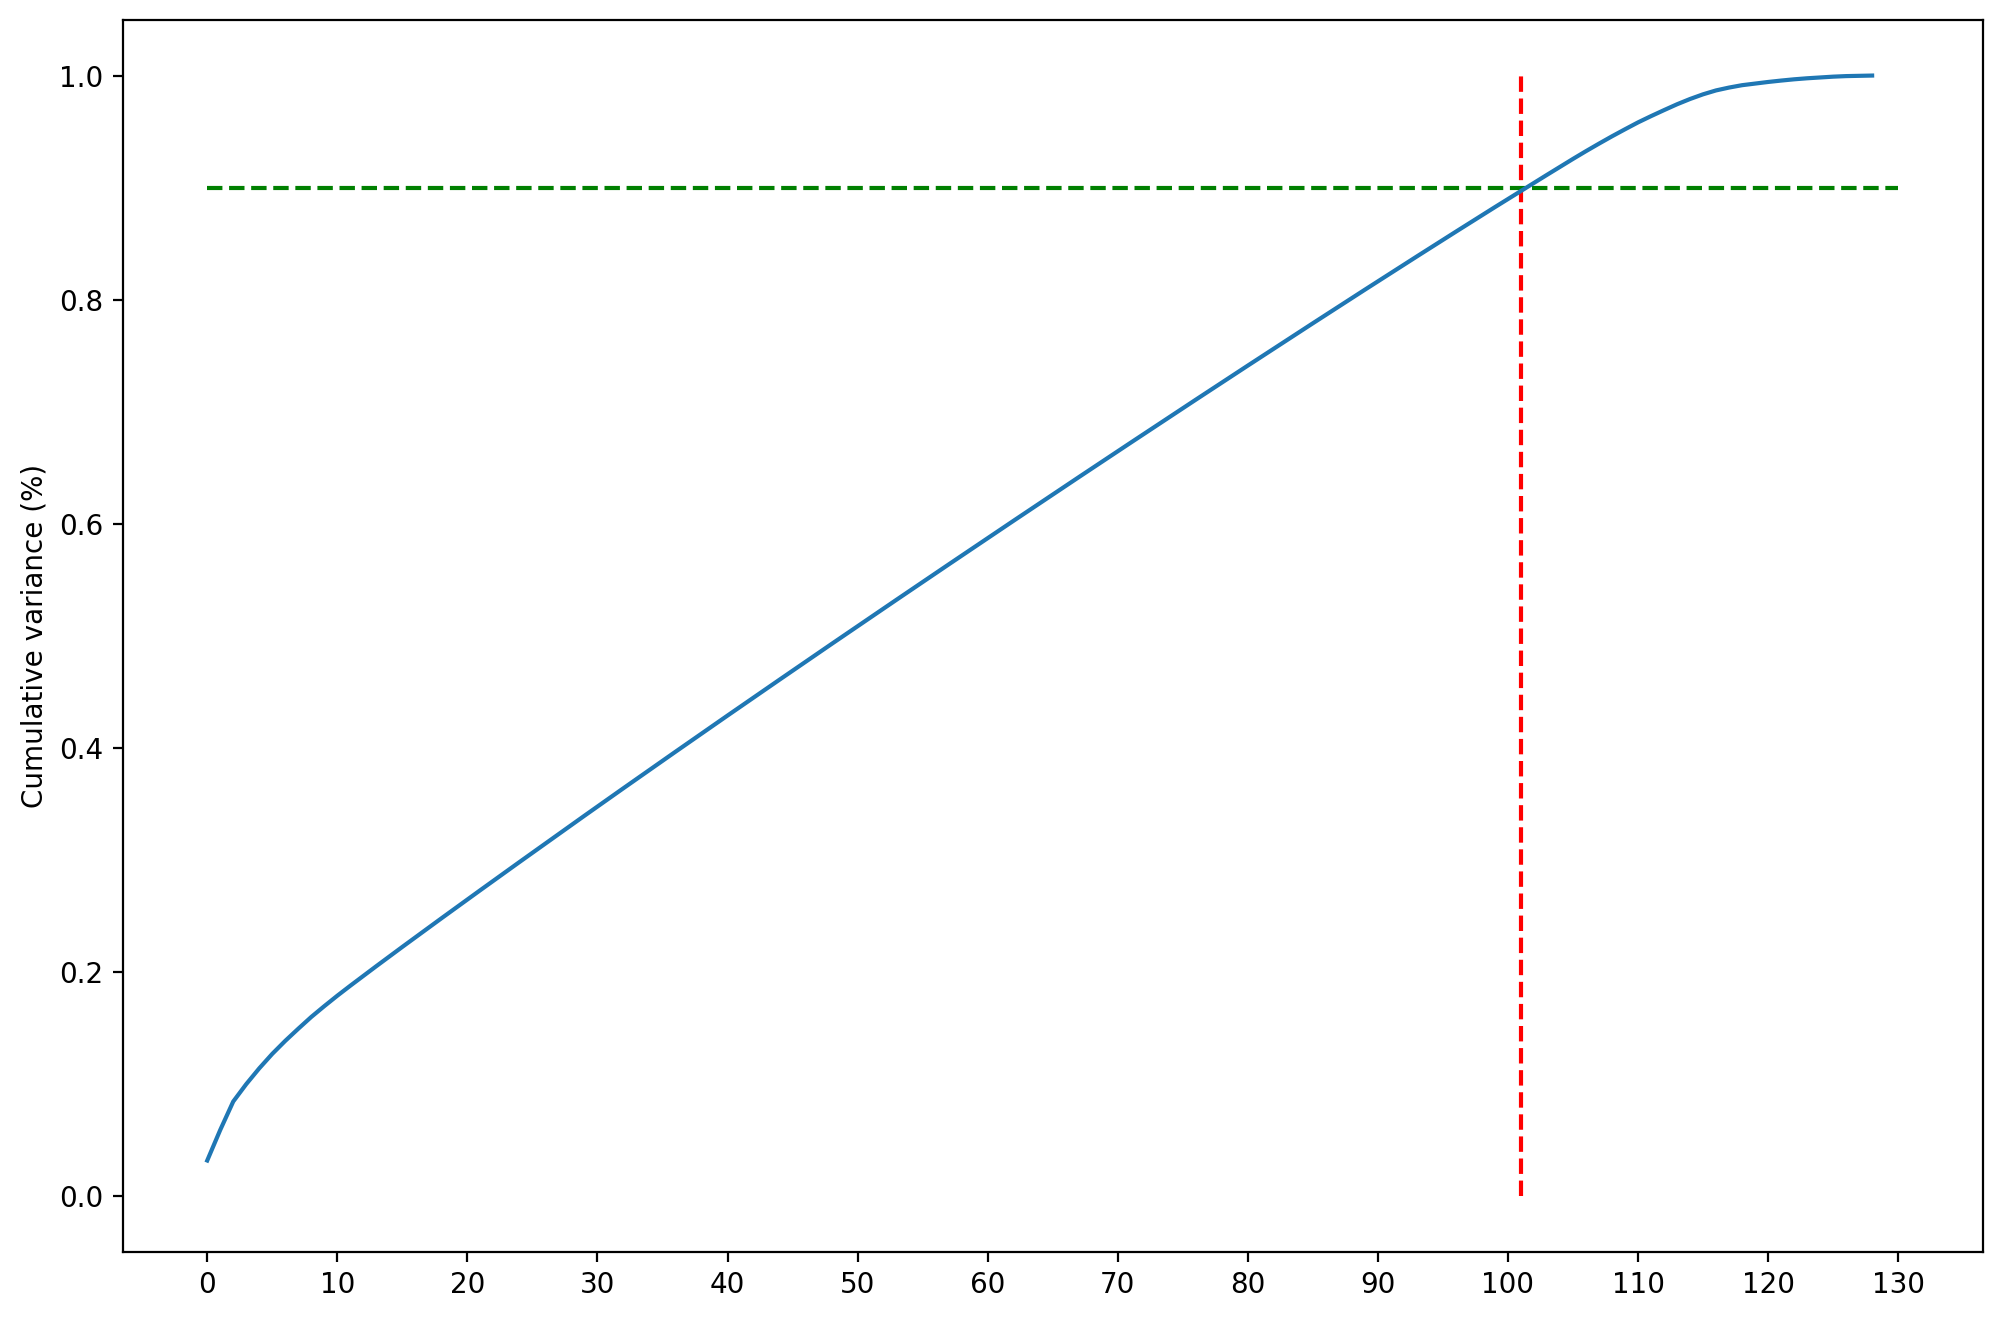

In [60]:
# Plotting the best number of PCA components

fig = plt.figure(figsize=[12,8], dpi=200)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130])
plt.vlines(x=101, ymax=1, ymin=0, colors='r', linestyles='--')
plt.hlines(y=0.90, xmax=130, xmin=0, colors='g', linestyles='--')
plt.plot(var_cumu)
plt.ylabel("Cumulative variance (%)")
plt.show()

In [61]:
# Data compression to 101 variables

pca_final = PCA(n_components=101)
X_pca_final = pca_final.fit_transform(X_scaled_train) 

In [62]:
print(X_pca_final.shape)

(47742, 101)


In [63]:
corrmat = np.corrcoef(X_pca_final.transpose())
corrmat.shape

(101, 101)

In [64]:
pca_df = pd.DataFrame(X_pca_final)
pca_df

0         1         2         3         4         5         6    \
0     -1.684446 -1.450387  1.282309 -0.843266 -1.667897  1.067668  0.056559   
1     -1.057884 -1.256859 -1.520201  0.014690  0.691502 -1.188608 -1.134510   
2      1.269514  1.850830 -3.123576  0.629426  1.232077 -1.332949 -0.722419   
3     -0.203714  1.180045 -3.181664 -0.411907 -0.972598  0.669299 -0.740153   
4      1.633259 -1.782343 -1.478348 -1.836268  1.538611  0.783657  1.782159   
...         ...       ...       ...       ...       ...       ...       ...   
47737  1.093416  1.203047 -0.102625  2.616443  1.728750  0.629348 -0.937518   
47738  2.961256 -1.294694  0.678036  3.607665  0.034314  1.107289  0.702011   
47739  0.524777 -2.874695  0.047862 -0.337343 -1.165915  0.161574 -0.830897   
47740  0.002786  0.793798  1.429544  0.299660  0.227777 -0.816065  0.133078   
47741  3.021461  0.434548 -1.112344 -1.179748  0.275652 -0.127116 -0.297753   

            7         8         9         10        11        12        13   \
0     -1.008640  1.263196 -2.366958 -1.880554 -1.115331 -0.491713 -1.925542   
1      0.809053  3.887260  0.746832  0.772067 -0.785483 -2.395941  0.238990   
2     -3.007246  1.342043 -0.162535 -0.729486 -0.248905  1.522492  3.008128   
3     -0.380667 -0.103214  1.327438  0.847262  2.677564  1.253894 -1.519261   
4     -2.505285 -1.980780  0.770833 -1.681701 -1.128864  1.399888  0.296138   
...         ...       ...       ...       ...       ...       ...       ...   
47737  0.601038 -0.963362 -0.933418  0.183520  0.388523 -0.367268  0.289659   
47738  1.405912 -0.752814 -0.764443 -0.316228  1.159580  0.173298 -0.123883   
47739 -0.373110 -0.643847  0.384116  0.390245 -0.128800 -0.266036 -0.256977   
47740  0.686740 -1.398879 -1.053821  0.957530  0.133879  0.230081 -0.296928   
47741  1.497026 -0.451913  0.402803  0.060483 -0.449132  0.559655 -0.693951   

            14        15        16        17        18        19        20   \
0     -1.344839 -1.178867 -0.231945 -0.940594 -0.532740 -0.951521 -0.294603   
1      1.731251 -1.084330  0.386164 -0.868954  0.210355 -2.540155 -0.770541   
2      0.332498  0.634500  1.508723 -0.900041 -2.266234 -0.631653 -1.078862   
3     -0.224034  0.876509  1.021728  2.632052 -1.135027  0.280747 -0.137606   
4      0.868882  1.944337 -0.866176  0.668318 -1.982877 -0.516978  2.029775   
...         ...       ...       ...       ...       ...       ...       ...   
47737  0.320270 -0.462366 -0.015503 -0.301069  0.326251 -0.303162 -0.209482   
47738  0.180076  0.339467 -0.097868  0.013586  0.177867 -0.184632  0.095378   
47739 -0.165301  0.418400 -0.344625  0.249799 -0.176216 -0.031744 -0.062070   
47740 -0.116335 -0.010646 -0.182181  0.087373  0.095994 -0.255571 -0.161402   
47741 -0.241261 -0.044763  0.115500 -0.040621 -0.529387  0.143192  0.079491   

            21        22        23        24        25        26        27   \
0     -1.378926  0.493759 -2.010117 -0.326417 -0.575060 -1.876856 -1.490264   
1     -0.565721  0.184775 -0.454137  0.901134  1.099052 -1.048504 -2.582918   
2      0.781413 -0.018442  1.115702  1.075840  1.074373 -0.643567 -0.856899   
3      0.639420  0.334176 -0.808017  0.935651 -0.420862 -2.436972  0.805256   
4     -2.668372 -1.355708  1.938766 -2.252502 -0.558864 -1.167910  0.680785   
...         ...       ...       ...       ...       ...       ...       ...   
47737 -0.125080  0.210245 -0.090580 -0.084899 -0.080666 -0.282564 -0.315638   
47738  0.082306 -0.375456  0.261938  0.018270 -0.186858 -0.032847  0.115745   
47739  0.024826 -0.260598  0.108305 -0.159034 -0.017515  0.043687  0.032733   
47740 -0.153858  0.194833 -0.079865 -0.134173 -0.000088 -0.091468 -0.320499   
47741  0.131552  0.080991  0.061860  0.033007  0.344267  0.466856  0.092798   

            28        29        30        31        32        33        34   \
0      0.064984 -0.013979  0.143457  0.813928 -2.148621  1.269167 -0.532651   
1      2.296578 -1.770478 -0.850105 -0.680206  0.986634  1

## Training models after PCA

In [65]:
X_pca_train = X_pca_final
X_pca_test = pca_final.transform(X_scaled_test)

print(X_pca_train.shape)
print(X_pca_test.shape)

(47742, 101)
(11936, 101)


### Decision Tree

In [66]:
dtree_pca = DecisionTreeClassifier()
dtree_pca.fit(X_pca_train, y_resampled)

DecisionTreeClassifier()

In [67]:
dtree_pca_pred = dtree_pca.predict(X_pca_test)

In [68]:
print(classification_report(y_test, dtree_pca_pred, zero_division=1))

dtree_pca_pr = evaluate(dtree_pca_pred, y_test)
dtree_pca_pr

              precision    recall  f1-score   support

           0       0.19      0.24      0.21      1691
           1       0.87      0.83      0.85     10245

    accuracy                           0.74     11936
   macro avg       0.53      0.53      0.53     11936
weighted avg       0.77      0.74      0.76     11936



{'f1-score': 0.21, 'accuracy': 0.74}

In [69]:
confusion_matrix(y_test, dtree_pca_pred)

array([[ 410, 1281],
       [1772, 8473]], dtype=int64)

### Random Forest

In [70]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_pca_train, y_resampled)

RandomForestClassifier()

In [71]:
rf_pca_pred = rf_pca.predict(X_pca_test)

In [72]:
print(classification_report(y_test, rf_pca_pred, zero_division=1))

rf_pca_pr = evaluate(rf_pca_pred, y_test)
rf_pca_pr

              precision    recall  f1-score   support

           0       0.34      0.03      0.05      1691
           1       0.86      0.99      0.92     10245

    accuracy                           0.85     11936
   macro avg       0.60      0.51      0.48     11936
weighted avg       0.79      0.85      0.80     11936



{'f1-score': 0.05, 'accuracy': 0.85}

In [73]:
confusion_matrix(y_test, rf_pca_pred)

array([[   43,  1648],
       [   85, 10160]], dtype=int64)

### Logistic Regression

In [74]:
lr_pca = LogisticRegression()
lr_pca.fit(X_pca_train, y_resampled)

LogisticRegression()

In [75]:
lr_pca_pred = lr_pca.predict(X_pca_test)

In [76]:
print(classification_report(y_test, lr_pca_pred, zero_division=1))

lr_pca_pr = evaluate(lr_pca_pred, y_test)
lr_pca_pr

              precision    recall  f1-score   support

           0       0.25      0.10      0.14      1691
           1       0.86      0.95      0.91     10245

    accuracy                           0.83     11936
   macro avg       0.56      0.53      0.52     11936
weighted avg       0.78      0.83      0.80     11936



{'f1-score': 0.14, 'accuracy': 0.83}

In [77]:
confusion_matrix(y_test, lr_pca_pred)

array([[ 168, 1523],
       [ 502, 9743]], dtype=int64)

### Naïve Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
nb_pca = GaussianNB()
nb_pca.fit(X_pca_train, y_resampled)

GaussianNB()

In [79]:
nb_pca_pred = nb_pca.predict(X_pca_test)

In [80]:
print(classification_report(y_test, nb_pca_pred, zero_division=1))

nb_pca_pr = evaluate(nb_pca_pred, y_test)
nb_pca_pr

              precision    recall  f1-score   support

           0       0.13      0.24      0.16      1691
           1       0.85      0.73      0.78     10245

    accuracy                           0.66     11936
   macro avg       0.49      0.48      0.47     11936
weighted avg       0.75      0.66      0.70     11936



{'f1-score': 0.16, 'accuracy': 0.66}

In [81]:
confusion_matrix(y_test, nb_pca_pred)

array([[ 404, 1287],
       [2812, 7433]], dtype=int64)

### K Nearest Neighbors(KNN)

In [82]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_resampled)

KNeighborsClassifier()

In [83]:
knn_pca_pred = knn_pca.predict(X_pca_test)

In [84]:
print(classification_report(y_test, knn_pca_pred, zero_division=1))

knn_pca_pr = evaluate(knn_pca_pred, y_test)
knn_pca_pr

              precision    recall  f1-score   support

           0       0.24      0.10      0.14      1691
           1       0.86      0.95      0.90     10245

    accuracy                           0.83     11936
   macro avg       0.55      0.52      0.52     11936
weighted avg       0.78      0.83      0.80     11936



{'f1-score': 0.14, 'accuracy': 0.83}

In [85]:
confusion_matrix(y_test, knn_pca_pred)

array([[ 165, 1526],
       [ 520, 9725]], dtype=int64)

### Multi Layer Perceptron Classifier (MLP)

In [86]:
mlp_pca = MLPClassifier(random_state=42)
mlp_pca.fit(X_pca_train, y_resampled)

C:\Users\barte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [87]:
mlp_pca_pred = mlp_pca.predict(X_pca_test)

In [88]:
print(classification_report(y_test, mlp_pca_pred, zero_division=1))

mlp_pca_pr = evaluate(mlp_pca_pred, y_test)
mlp_pca_pr

              precision    recall  f1-score   support

           0       0.22      0.15      0.18      1691
           1       0.87      0.91      0.89     10245

    accuracy                           0.80     11936
   macro avg       0.54      0.53      0.53     11936
weighted avg       0.77      0.80      0.79     11936



{'f1-score': 0.18, 'accuracy': 0.8}

In [89]:
confusion_matrix(y_test, mlp_pca_pred)

array([[ 255, 1436],
       [ 912, 9333]], dtype=int64)

### XGBoost Classifier

In [90]:
xgb_pca = XGBClassifier(random_state=42)
xgb_pca.fit(X_pca_train, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [91]:
xgb_pca_pred = xgb_pca.predict(X_pca_test)

In [92]:
print(classification_report(y_test, xgb_pca_pred, zero_division=1))

xgb_pca_pr = evaluate(xgb_pca_pred, y_test)
xgb_pca_pr

              precision    recall  f1-score   support

           0       0.26      0.06      0.10      1691
           1       0.86      0.97      0.91     10245

    accuracy                           0.84     11936
   macro avg       0.56      0.52      0.51     11936
weighted avg       0.78      0.84      0.80     11936



{'f1-score': 0.1, 'accuracy': 0.84}

In [93]:
confusion_matrix(y_test, xgb_pca_pred)

array([[ 109, 1582],
       [ 310, 9935]], dtype=int64)

In [94]:
pca_prediction_data={'Model': ['Decision Tree',
                              'Random Forest',
                              'Logistic Regression',
                              'Naive Bayes',
                              'KNN',
                              'MLP',
                              'XGB'
                               ],
                     
                   'F1-score': [dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              lr_pr['f1-score'],
                              nb_pr['f1-score'],
                              knn_pr['f1-score'],
                              mlp_pr['f1-score'],
                              xgb_pr['f1-score']
                               ],
                 
                   'Accuracy': [dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              lr_pr['accuracy'],
                              nb_pr['accuracy'],
                              knn_pr['accuracy'],
                              mlp_pr['accuracy'],
                              xgb_pr['accuracy']
                               ],
                     
         'F1-score after PCA':[dtree_pca_pr['f1-score'],
                              rf_pca_pr['f1-score'],
                              lr_pca_pr['f1-score'],
                              nb_pca_pr['f1-score'],
                              knn_pca_pr['f1-score'],
                              mlp_pca_pr['f1-score'],
                              xgb_pca_pr['f1-score']
                               ],
                               
         'Accuracy after PCA':[dtree_pca_pr['accuracy'],
                              rf_pca_pr['accuracy'],
                              lr_pca_pr['accuracy'],
                              nb_pca_pr['accuracy'],
                              knn_pca_pr['accuracy'],
                              mlp_pca_pr['accuracy'],
                              xgb_pca_pr['accuracy']
                               ],

                    }
 
# Create DataFrame
prediction_table_all = pd.DataFrame(pca_prediction_data)
prediction_table_all

Model  F1-score  Accuracy  F1-score after PCA  \
0        Decision Tree      0.21      0.75                0.21   
1        Random Forest      0.05      0.85                0.05   
2  Logistic Regression      0.03      0.86                0.14   
3          Naive Bayes      0.24      0.58                0.16   
4                  KNN      0.14      0.83                0.14   
5                  MLP      0.22      0.79                0.18   
6                  XGB      0.09      0.85                0.10   

   Accuracy after PCA  
0                0.74  
1                0.85  
2                0.83  
3                0.66  
4                0.83  
5                0.80  
6                0.84

None of the models improved both their metrics (f1_score and accuracy) after applying PCA. The Logistic Regression algorithm significantly improved its f1_score and lowered accuracy. The XGB model slightly improved its f1_score and worsened accuracy. After PCA, the Decision Tree has the highest f1_score value, but it has not changed compared to the previous results. The Random Forest and KNN models did not change their results. The accuracy metric has undergone minor fluctuations in some models. The results obtained from the first modeling seem to be better than those obtained after PCA.

## Further work will continue

## Choosing one model and fitting the parameters

The Random Forest, Logistic Regression and the Support Vector Machine (SVM) seemed to be the best models with the highest F1-score and accuracy. The use of PCA on these models did not improve the results. All of these 3 models predicted that borrowers would always or almost always repay their loans (almost all predictions in y_pred were 1). Therefore, there was a choice between models: Decision Tree, Naive Bayes (before PCA) and K-NearestNeighbors(KNN). The K Nearest Neighbor (KNN) model was chosen as the final one for slightly better results - accuracy 0.78 and f1-score 0.88.

In [ ]:
# Using standardized data from the previous KNN model (before PCA) and checking the shape

print(X_scaled_train.shape)
print(X_scaled_test.shape)
print(y_scaled_train.shape)
print(y_scaled_test.shape)

In [ ]:
# Searching for the best number of neighbors 

from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,6)]
scores = []

X_scaled_train = scaler.fit_transform(X_scaled_train)

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_k, X_scaled_train, y_scaled_train, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [ ]:
acc_scores = pd.DataFrame({'n_neighbors': [1, 2, 3, 4, 5],
                           
                          'Accuracy': [scores[0],
                                       scores[1],
                                       scores[2],
                                       scores[3],
                                       scores[4],
                                                                             
                                      ]})

acc_scores.style.hide_index()

In [ ]:
# Gread Search Cross Validation for the best hyperparameters

from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3, n_jobs = -1)

In [ ]:
# Fitting the model on the train set

g_res = gs.fit(X_scaled_train, y_scaled_train)

In [ ]:
# Finding the best score

g_res.best_score_

In [ ]:
g_res.best_params_

In [ ]:
# Checking the data balance and confusion matrix

knn_5 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_5.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred5 = knn_5.predict(X_scaled_test)
count_y_pred5 = np.unique(y_pred5, return_counts=True)
count_y_pred5

In [ ]:
matrix_k5 = confusion_matrix(y_scaled_test, y_pred5)
matrix_k5

The high accuracy of this model is due to the very large number of true positive predictions. It is likely that the model will show positive loan capacity in most applications, which will be unfavorable for the loan company.

In [ ]:
knn_4 = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
knn_4.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred4 = knn_4.predict(X_scaled_test)
count_y_pred4 = np.unique(y_pred4, return_counts=True)
count_y_pred4

In [ ]:
matrix_k4 = confusion_matrix(y_scaled_test, y_pred4)
matrix_k4

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_3.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred3 = knn_3.predict(X_scaled_test)
count_y_pred3 = np.unique(y_pred3, return_counts=True)
count_y_pred3

In [ ]:
matrix_k3 = confusion_matrix(y_scaled_test, y_pred3)
matrix_k3

For the model with 4 and 3 neighbors, the situation is similar to the model with 5 neighbors.

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn_2.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred2 = knn_2.predict(X_scaled_test)
count_y_pred2 = np.unique(y_pred2, return_counts=True)
count_y_pred2

In [ ]:
matrix_k2 = confusion_matrix(y_scaled_test, y_pred2)
matrix_k2

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_1 = knn_1.fit(X_scaled_train, y_scaled_train)

In [ ]:
y_pred1 = knn_1.predict(X_scaled_test)
count_y_pred1 = np.unique(y_pred1, return_counts=True)
count_y_pred1

In [ ]:
matrix_k1 = confusion_matrix(y_scaled_test, y_pred1)
matrix_k1

In [ ]:
print(classification_report(y_scaled_test, y_pred1, zero_division=1))

knn_1_pr = evaluate(y_pred1, y_scaled_test)
knn_1_pr

For n_neighbors = 2 are more true negative (TN) answers and fewer true positive (TP) answers than for n_neighbors = 1. For n_neighbors = 2 the accuracy and f1_score were 0.72 and 0.83 and for n_neighbors = 1 the scores were 0.79 and 0.88 respectively. The KNN model with 1 neighbor was chosen as the final one after hyperparameters tuning.

In [ ]:
y_proba = knn.predict_proba(X_scaled_test)[:, 1]
y_proba

In [ ]:
# Ploting the roc_curve and calculating the roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rp_auc = roc_auc_score(y_scaled_test, y_pred1)
rf_auc = roc_auc_score(y_scaled_test, y_proba)

# Summarizing scores
print('Random prediction: ROC AUC=%.3f' % (rp_auc))
print('KNN model: ROC AUC=%.3f' % (rf_auc))

# Calculating roc curves
rp_fpr, rp_tpr, _ = roc_curve(y_scaled_test, y_pred1)
rf_fpr, rf_tpr, _ = roc_curve(y_scaled_test, y_proba)

# Ploting the roc curve for the model
plt.figure(figsize=(12,8))
plt.plot(rp_fpr, rp_tpr, linestyle='--', label='Random prediction')
plt.plot(rf_fpr, rf_tpr, marker='.', label='KNN model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Prediction using the K Nearest Neighbors (KNN)

In [ ]:
# Prediction of first 20 values

print('Predicted values:', y_pred1[0:20])
print('Real values: \n', y_scaled_test[:20]) 

In [ ]:
print('Well-predicted values in testing:', (y_scaled_test == y_pred1).sum())
print('All values in testing part:', y_scaled_test.shape[0])
print()
print('Accuracy = Well-predicted values in testing part/ All values in testing part:', ((y_scaled_test == y_pred1).sum() / y_scaled_test.shape[0]).round(4))
print()
print('Accuracy with sklearn:', knn_1.score(X_scaled_test, y_scaled_test).round(4))

## Trying out the model on selected data

In [ ]:
# Correlation between loan_status and other features

df[df.columns[0:]].corr()['loan_status'][:].sort_values(key=abs, ascending=False)

In [ ]:
# Selection of variables to test the model (based not on the correlation with loan_status)

new_X = df[['int_rate', 'sub_grade', 'term', 'fico_score', 'loan_amnt']].values
new_y = y

In [ ]:
knn_1.fit(new_X, new_y)

In [ ]:
y_pred_new = knn_1.predict(new_X)

In [ ]:
print(new_y[:20].values)
print(y_pred_new[:20])

In [ ]:
knn_new_count = np.unique(y_pred_new, return_counts=True)
knn_new_count

In [ ]:
matrix_new = confusion_matrix(new_y, y_pred_new)
matrix_new

In [ ]:
print(classification_report(new_y, y_pred_new, zero_division=1))

knn_new_pr = evaluate(y_pred_new, new_y)
knn_new_pr

In [ ]:
# Enter the appropriate values to predict the probability that the loan will be repaid:

int_rate = float(input('Interest Rate on the loan: (5 - 25): '))
sub_grade = int(input('LC assigned loan subgrade (1 - 7 / 1: best): '))
term = int(input('The number of payments on the loan (36 or 60 months): '))
fico_score = int(input('FICO score (500 - 850): '))
loan_amnt = float(input('The listed amount of the loan applied for by the borrower (500 - 35000): '))

In [ ]:
# Predicting whether the customer will pay off the loan (0 - No or 1 - Yes)

print(knn_1.predict([[int_rate, sub_grade, term, fico_score, loan_amnt]]))

# Conclusion

The project, which concerns predicting whether Lending Club clients will pay off their loans, has been divided into 4 parts: Data Processing, Exploratory Data Analysis, Feature Engineering, and Modeling. After a thorough cleaning of the data and the introduction of new ones, machine learning models were implemented. Six of them were tested: Decision Tree, Logistic Regression, Random Forest, Naive Bayes, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). The three models gave similar accuracy and f1-score results (Random Forest, Logistic Regression and Support Vector Machine). Based on the prepared data, the these 3 models predicted that the vast majority of the potential borrowers would repay their loan. Such a solution would be useless for the lending company. The three other models showed similar results. Finally, the K Nearest Neighbors model (the best model) was used to predict whether borrowers would be able to repay their loans. The dependent variables correlated with the target (loan_status) were selected and the K Nearest Neighbors model was built only with them. By manually entering the selected 5 variables mentioned above, the model predicts whether the new borrower will be able to repay the loan or not.